# Задание 07. Методы отбора признаков

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def logistic_reg(selected_features, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y)
  model = LogisticRegression(max_iter=5000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return accuracy_score(y_test, y_pred)

def lin_reg(selected_features, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return mean_squared_error(y_test, y_pred)

In [ ]:
titanic = sns.load_dataset("titanic")
titanic = titanic.dropna()
titanic_X = titanic.drop("survived", axis=1)
titanic_y = titanic["survived"]
numeric_titanic_X = titanic_X.select_dtypes("number")
numeric_titanic_X_min_max = pd.DataFrame(MinMaxScaler().fit_transform(numeric_titanic_X), columns=numeric_titanic_X.columns)
numeric_titanic_X_standard = pd.DataFrame(StandardScaler().fit_transform(numeric_titanic_X), columns=numeric_titanic_X.columns)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


### Задание 1: Работа с корреляционной матрицей.
Используйте набор данных "Iris" из sklearn.datasets. Вычислите корреляционную матрицу числовых признаков. Затем визуализируйте эту матрицу с помощью heatmap в библиотеке seaborn.

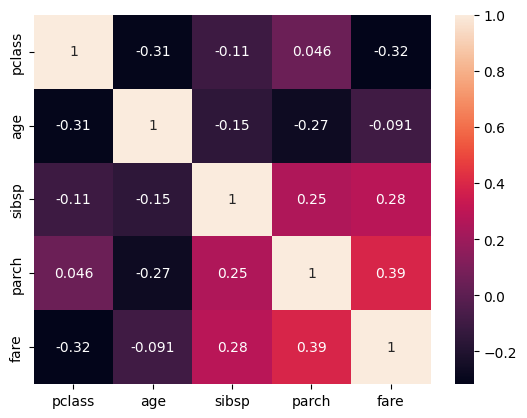

In [ ]:
sns.heatmap(numeric_titanic_X.corr(), annot=True)
plt.show()

### Задание 2: Исключение мультиколлинеарных признаков.
Используйте набор данных "Wine" из sklearn.datasets. Вычислите корреляционную матрицу, а затем найдите и исключите признаки, у которых корреляция друг с другом превышает заданный порог.


In [ ]:
def task_2(data_set):
  corr = np.abs(data_set.corr())
  border = 0.3
  drop_cols = set()
  for i in corr.columns:
      for j in corr.columns:
          if i != j and corr.loc[i, j] > border:
              drop_cols.add(j)
  result = data_set.drop(columns=list(drop_cols))
  return result


titanic_X_filtered = task_2(numeric_titanic_X)
titanic_X_filtered_min_max = task_2(numeric_titanic_X_min_max)
titanic_X_filtered_standard = task_2(numeric_titanic_X_standard)
display(f"Features to delete: {titanic_X_filtered.columns}")
display(f"Features to delete(min max): {titanic_X_filtered_min_max.columns}")
display(f"Features to delete(standard): {titanic_X_filtered_standard.columns}")

"Features to delete: Index(['sibsp'], dtype='object')"

"Features to delete(min max): Index(['sibsp'], dtype='object')"

"Features to delete(standard): Index(['sibsp'], dtype='object')"

In [ ]:
display(f"Logistic Regression: {logistic_reg(titanic_X_filtered.select_dtypes("number").columns, titanic_X_filtered, titanic_y)}")
display(f"Logistic Regression: {logistic_reg(titanic_X_filtered_min_max.select_dtypes("number").columns, titanic_X_filtered_min_max, titanic_y)}")
display(f"Logistic Regression: {logistic_reg(titanic_X_filtered_standard.select_dtypes("number").columns, titanic_X_filtered_standard, titanic_y)}")

'Logistic Regression: 0.6956521739130435'

'Logistic Regression: 0.6521739130434783'

'Logistic Regression: 0.5652173913043478'

### Задание 3: Выбор наиболее значимых признаков.
Используйте набор данных "Boston Housing" из sklearn.datasets. Вычислите коэффициенты корреляции между каждым признаком и целевой переменной, затем выберите n признаков с наибольшим абсолютным значением коэффициента.


In [ ]:
def task_3(data_set):
  corr = data_set.corrwith(titanic_y).abs()
  top_features = corr.nlargest(5).index
  return top_features

top_features = task_3(numeric_titanic_X)
top_features_min_max = task_3(numeric_titanic_X_min_max)
top_features_standard = task_3(numeric_titanic_X_standard)
display(f"Top features: {top_features}")
display(f"Top features(min max): {top_features_min_max}")
display(f"Top features(standard): {top_features_standard}")

"Top features: Index(['age', 'fare', 'sibsp', 'pclass', 'parch'], dtype='object')"

"Top features(min max): Index(['pclass', 'fare', 'age', 'sibsp', 'parch'], dtype='object')"

"Top features(standard): Index(['pclass', 'fare', 'age', 'sibsp', 'parch'], dtype='object')"

In [ ]:
display(f"Linear Regression {logistic_reg(top_features, titanic_X, titanic_y)}")
display(f"Linear Regression {logistic_reg(top_features_min_max, numeric_titanic_X_min_max, titanic_y)}")
display(f"Linear Regression {logistic_reg(top_features_standard, numeric_titanic_X_standard, titanic_y)}")

'Linear Regression 0.717391304347826'

'Linear Regression 0.6739130434782609'

'Linear Regression 0.6956521739130435'

### Задание 4: Применение Ранговой корреляции Спирмена.
Используйте любой набор данных, имеющий порядковые признаки. Примените корреляцию Спирмена для выбора наиболее значимых признаков.

In [ ]:

def task_4(data_set):
  corr = numeric_titanic_X.apply(lambda col: spearmanr(col, titanic_y).correlation).abs()
  top_features = corr.nlargest(3).index
  return top_features

top_features = task_4(numeric_titanic_X)
top_features_min_max = task_4(numeric_titanic_X_min_max)
top_features_standard = task_4(numeric_titanic_X_standard)
display(f"Top features: {top_features}")
display(f"Top features(min max): {top_features_min_max}")
display(f"Top features(standard): {top_features_standard}")

"Top features: Index(['age', 'fare', 'sibsp'], dtype='object')"

"Top features(min max): Index(['age', 'fare', 'sibsp'], dtype='object')"

"Top features(standard): Index(['age', 'fare', 'sibsp'], dtype='object')"

In [ ]:
display(f"Logistic Regression: {logistic_reg(top_features, numeric_titanic_X, titanic_y)}")
display(f"Logistic Regression: {logistic_reg(top_features_min_max, numeric_titanic_X_min_max, titanic_y)}")
display(f"Logistic Regression: {logistic_reg(top_features_standard, numeric_titanic_X_standard, titanic_y)}")

'Logistic Regression: 0.6521739130434783'

'Logistic Regression: 0.6086956521739131'

'Logistic Regression: 0.6304347826086957'

### Задание 5: Сравнение методов отбора признаков.
Используйте один и тот же набор данных для применения различных методов отбора признаков, включая корреляционные методы, и сравните результаты.
